- As project 2, I made functions at .py file, and then ,plot results in .ipynb file. 
- I condider Repeated First Price Auction(hereinafter called repeated FPA), not second price auction.
- Players in Repeated FPA must have algorithm whose regret coverges to 0. 

# Project 3: Repeated First Price Auction

## Information Setting: Full Information + Full Feedback

- Full Information: Each player knows their own value (v) which is fixed across all rounds
- Full Feedback: After each round, each player observes all bids from all players, not just their own outcome

This setting allows players to use opponent's bid history directly in their learning algorithms.

## Parameters

- n_rounds: 1000 - number of rounds per simulation
- k: 100 - number of discrete arms (discretization level)
- n_mc: 100 - number of Monte Carlo simulation runs
- h: scaling parameter (default: value) - used in Exponential Weight algorithms
- value (v): 10.0 - player's value for the item (default)
- learning_rate: sqrt(log(k) / n) - learning rate for Exponential Weight algorithms (default for flexible)
- delta: 0.95 - discount factor for long-term algorithm (default)
- observation_rounds: 20 - number of observation rounds for exploitation algorithm (default)

## Algorithms

1. 1_myopic: Myopic algorithm - maximizes current round expected utility
2. 2_long: Long-term algorithm - maximizes discounted long-term utility
3. 3_flexible: Flexible algorithm - Exponential Weight with learning_rate = np.sqrt(np.log(k) / n)
4. 4_cool: Cool algorithm - always bids v/2
5. 5_feeling: Feeling algorithm - Exponential Weight over 5 strategy arms
6. 6_Exploitation: Exploitation algorithm - waits and exploits when opponent bids low

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import statistics

In [ ]:
# **Information Setting: Full Information + Full Feedback**
# 
# We implement **Full Information** setting:
# - Each player knows their own value (v) which is fixed across all rounds
# - Each player knows that other players have fixed values
# 
# We implement **Full Feedback** setting:
# - After each round, each player observes:
#   - Their own bid, utility, and whether they won
#   - **Opponent's bid** (this is the key difference from partial information)
#   - Opponent's utility (can be inferred) and whether opponent won
# 
# This means players have complete information about past actions and can use opponent's bid history to make better decisions.

# Here is our model (two_repeatedFPA.py / n_repeatedFPA.py).
# At each round i, each player decides their bid based on the past information (including opponent's bids) and his/her strategy.
# Then, FPA is played.
# After FPA, each player gets utility and observes all bids.
# Then, this process is repeated.

# As is often the case, notation is followed.
# n is the number of players.
# v is the value of the item.
# b is the bid of the player.
# u is the utility of the player.
# p is the probability of winning.

# regret was determined by the difference between the utility he could get (best fixed action in hindsight) and the utility he got.

# Here are our Assumptions:
# - **Full Information**: Each player knows their own value (fixed across rounds)
# - **Full Feedback**: After each round, each player observes all bids from the round
# - If win, utility is calculated by value - bid, if lose, utility is 0.
# - If there is a tie in bid, then the players who bid highest get the item by flipping a coin.
# - Discrete value and discrete bid to calculate. 

# Monte carlo simulation to get the result.
# 10000 rounds, 2000 times.

# I proposed 7 types of algorithms to consider.
# I named them as Myopic Model, Long Model, Optimal Model, Uniform Model, FTL Model, Cool Model, and Feeling Model.
# Each algorithm can be defined by a function whose argument is the past information and the number of rounds, and returns the bid.

# First, I made myopic algorithm which is tuned to cares about only current round. (1_myopic Model)
    # This can be implemented by using our Project1's idea!! culculate other bidder's CDF of bid. 
    # At each round, it calculate the CDF of other bidders' highest bid, then calculate the probability of winning.
    # Hence, we get expected value of bid.

# Second, I made algorithm which is tuned to cares about long-term payoff. (2_long Model)
    # This is really difficult to implement. 
    # At each round, it calculate the CDF of other bidders' highest bid.
    # I used time-discounted sum, and algorithm will make long-term payoff.
    # This algorithm represent the smart player in auction.

# Third, I made algorithm which is tuned optimally to balance between two algorithms above. (3_flexible Model)
    # This is basic EXponential weight algorithm with nice learning rate = sqrt(log(k) / n).

# Forth, I made algorithm which bid random value between 0 and v. (4_uniform Model)
    # I concerned that this algorithm's regret do not converge to 0. 

# Fifth, I made algorithm which is tuned to be FTL. (5_ftl Model)
    # This is basic EXponential weight algorithm with nice learning rate = 100

# Sixth, I made algorithm which always bids theoretical optimal value. (4_cool Model)
    # Always pay n-1/n * v. 

 # Seventh, I made algorithm which is tuned to choose algorithm based on the past rounds results. (5_feeling Model)
    # I model the basic people's feeling of bidding. If you lose many times, you tend to bid higher.
    # what is the difference between this and 3_flexible Model is that 6th choose which algorithm to use. 
    # For example, 
    # first strategy is to bid aggressively 3/4 of v
    # second strategy is to bid normaly 1/2 of v
    # third strategy is to bid conservatively 1/4 of v
    # if you lose many times, you tend to use first strategy.
    # if you win many times, you tend to use second strategy.
    # if you win and lose many times, you tend to use third strategy.

In [ ]:
# collect algorithm
import importlib
import sys
from pathlib import Path

# Add algorithm directory to path (works in Jupyter notebooks)
algorithm_dir = Path('algorithm')
if str(algorithm_dir.resolve()) not in sys.path:
    sys.path.insert(0, str(algorithm_dir.resolve()))

# Import modules with numeric names using importlib and create aliases
myopic = importlib.import_module('1_myopic')
long = importlib.import_module('2_long')
flexible = importlib.import_module('3_flexible')
# Note: 4_random and 5_ftl are removed - they can be represented by flexible with different learning rates
# 4_random: random strategy (can be removed as it doesn't converge to 0 regret)
# 5_ftl: flexible with learning_rate = 100
cool = importlib.import_module('4_cool')
feeling = importlib.import_module('5_feeling')
exploitation = importlib.import_module('6_Exploitation')

# Import other modules
import two_repeatedFPA

# Part 1
- we simulate the game with mixed players who use above algorithms(This is Part1). 

In [ ]:
# Part 1 Implementation
# Parameters
n_rounds = 1000  # number of rounds
k = 100  # number of arms (discretization)
n_mc = 100  # number of Monte Carlo simulations

# Import simulation and plotting functions from two_repeatedFPA.py
from two_repeatedFPA import run_repeated_fpa, plot_part1_results

print("Part 1 simulation functions imported from two_repeatedFPA.py")


Part 1 simulation functions defined


In [ ]:
# Plotting functions are now in two_repeatedFPA.py
# Use plot_part1_results() from two_repeatedFPA module


Plotting functions defined


In [ ]:
# Example: Run simulation with different algorithm combinations
# Test different matchups

# Note: n_mc = 100 can take a long time. For quick testing, use n_mc = 10
# Uncomment the examples below to run simulations

# Example 1: Myopic vs Flexible
# print("Running: Myopic vs Flexible")
# v1, v2 = 10.0, 10.0
# player1 = (myopic.myopic_algorithm, v1, {'k': k, 'h': v1})
# player2 = (flexible.flexible_algorithm, v2, {'k': k, 'h': v2, 'learning_rate': np.sqrt(np.log(k) / n_rounds)})
# results_myopic_vs_flexible = run_repeated_fpa(player1, player2, n_rounds, n_mc, k=k)
# print("Completed: Myopic vs Flexible")
# plot_part1_results(results_myopic_vs_flexible, title="Myopic vs Flexible")

Running: Myopic vs Flexible
MC iteration 10/100 completed
MC iteration 20/100 completed
MC iteration 30/100 completed
MC iteration 40/100 completed
MC iteration 50/100 completed
MC iteration 60/100 completed
MC iteration 70/100 completed
MC iteration 80/100 completed
MC iteration 90/100 completed
MC iteration 100/100 completed
Completed: Myopic vs Flexible
Figure saved to: ../figures/myopic_vs_flexible.png


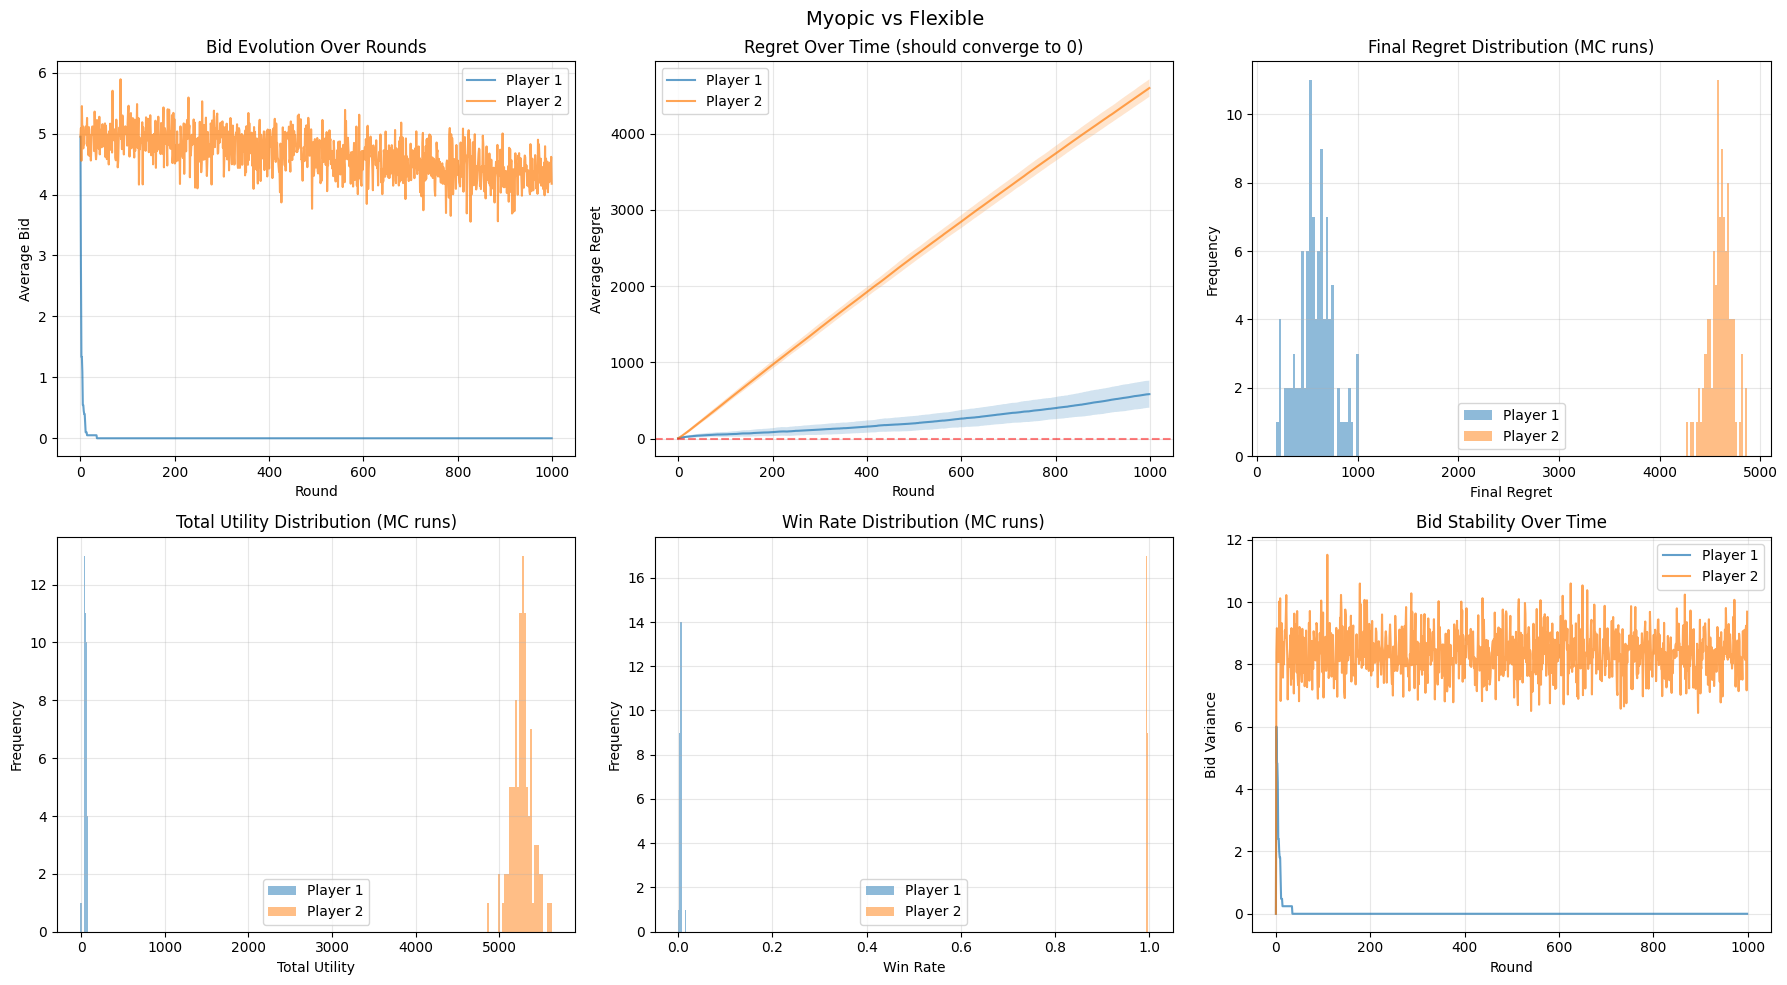


=== Summary Statistics ===
Player 1:
  Mean Regret: 582.62 ± 178.07
  Mean Utility: 51.41 ± 20.50
  Mean Win Rate: 0.007 ± 0.003

Player 2:
  Mean Regret: 4598.09 ± 114.79
  Mean Utility: 5269.70 ± 124.40
  Mean Win Rate: 0.993 ± 0.003


In [5]:
# Run simulation: Myopic vs Flexible
print("Running: Myopic vs Flexible")
v1, v2 = 10.0, 10.0
player1 = (myopic.myopic_algorithm, v1, {'k': k, 'h': v1})
player2 = (flexible.flexible_algorithm, v2, {'k': k, 'h': v2, 'learning_rate': np.sqrt(np.log(k) / n_rounds)})
results_myopic_vs_flexible = run_repeated_fpa(player1, player2, n_rounds, n_mc, k=k)
print("Completed: Myopic vs Flexible")
plot_part1_results(results_myopic_vs_flexible, title="Myopic vs Flexible")


# Part 2
- Exploitative strategy vs 1_myopic (Myopic strategy)
- Exploitative strategy vs 2_long (Long-term strategy)
- Exploitative strategy vs 3_flexible (learning rate = sqrt(log(k) / n))
- Exploitative strategy v (Random strategy)
- Exploitative strategy vs (FTL, learning rate = 100)
- Exploitative strategy vs 4_cool (Cool strategy)
- Exploitative strategy vs 5_feeling (Feeling strategy)

In [ ]:
# Candidate of Exploitative strategy for each strategy(1,2,3,4,5,6,7)
# Strategy Against 1_myopic : 
# Strategy Against 2_long : 
# Strategy Against 3_flexible : 
# Strategy Against 4_cool : 
# Strategy Against 5_feeling : 

In [ ]:
# Example 2: Flexible vs Exploitation
# print("Running: Flexible vs Exploitation")
# v1, v2 = 10.0, 10.0
# player1 = (flexible.flexible_algorithm, v1, {'k': k, 'h': v1, 'learning_rate': np.sqrt(np.log(k) / n_rounds)})
# player2 = (exploitation.exploitation_algorithm, v2, {'k': k, 'h': v2, 'observation_rounds': 20})
# results_flexible_vs_exploitation = run_repeated_fpa(player1, player2, n_rounds, n_mc, k=k)
# print("Completed: Flexible vs Exploitation")
# plot_part1_results(results_flexible_vs_exploitation, title="Flexible vs Exploitation")

In [ ]:
# Part 2: Flexible vs Exploitation
print("Running: Flexible vs Exploitation (Part 2)")
v1, v2 = 10.0, 10.0
player1 = (flexible.flexible_algorithm, v1, {'k': k, 'h': v1, 'learning_rate': np.sqrt(np.log(k) / n_rounds)})
player2 = (exploitation.exploitation_algorithm, v2, {'k': k, 'h': v2, 'observation_rounds': 20})
results_flexible_vs_exploitation = run_repeated_fpa(player1, player2, n_rounds, n_mc, k=k)
print("Completed: Flexible vs Exploitation")
plot_part1_results(results_flexible_vs_exploitation, title="Flexible vs Exploitation (Part 2)")
